# Week5 - Lab

* Assign X, y
* Train-test split
* Visualize & speculate on training dataset
* Train a logistic regression model
* Evaluate the model, roc score
* Explain findings

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

# https://www.kaggle.com/datasets/muhammadtalharasool/simple-gender-classification?select=gender.csv
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/gender.csv').iloc[:,:-1]
df.columns = df.columns.str.strip()
df.Gender = df.Gender.str.strip()

In [2]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


In [3]:
df.rename(columns = {'Height (cm)':'height_cm',
                     'Weight (kg)':'weight_kg',
                     'Education Level':'EducationLevel',
                     'Income (USD)': 'Income_USD', 
                     'Favorite Color':'favouriteColor',
                     'Marital Status':'maritalStatus'}, inplace = True)

In [4]:
df.head()

,Gender,Age,height_cm,weight_kg,Occupation,EducationLevel,maritalStatus,Income_USD,favouriteColor
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


<AxesSubplot:>

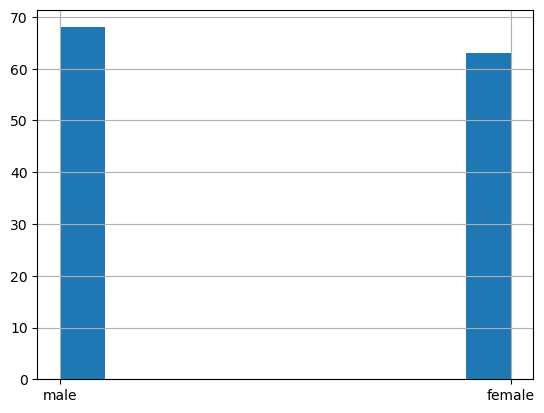

In [5]:
df.Gender.hist()

In [ ]:
# sns.pairplot(df, hue='Gender')

Height and weight have a very strong correlation. Hence, any of the column has to be dropped.

In [6]:
df.head()

,Gender,Age,height_cm,weight_kg,Occupation,EducationLevel,maritalStatus,Income_USD,favouriteColor
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


In [7]:
df.maritalStatus.value_counts()

Married      41
Single       38
 Married     24
 Single      21
 Divorced     4
 Widowed      2
Divorced      1
Name: maritalStatus, dtype: int64

In [8]:
df['maritalStatus'] = df['maritalStatus'].str.lower().str.lstrip()

In [9]:
df.maritalStatus.value_counts()

married     65
single      59
divorced     5
widowed      2
Name: maritalStatus, dtype: int64

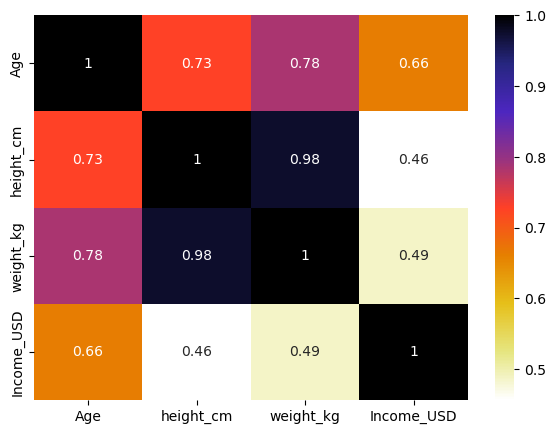

In [10]:
import seaborn as sns
plt.figure(figsize=(7,5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap = plt.cm.CMRmap_r)
plt.show()

In [11]:
df = df.drop('weight_kg',axis=1)

In [12]:
features = [x for x in df.columns if x != 'Gender']
categorical_vars = [col for col in df[features].columns if df[col].dtype == 'object']
numerical_vars = [col for col in df[features].columns if col not in categorical_vars]

In [13]:
from sklearn.model_selection import train_test_split

def generate_splits():
    y = df['Gender']
    X = df[[x for x in df.columns if x!= 'Gender']]

    return train_test_split(X, y, test_size=0.2, random_state=124)

X_train, X_test, y_train, y_test = generate_splits()

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 104
Test examples: 27


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

In [15]:
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_vars),
                                          ('create_dummies', cat_pipeline, categorical_vars)])

In [16]:
from sklearn.linear_model import LogisticRegression
modeling_pipeline = Pipeline([('data_processing', processing_pipeline),('logreg', LogisticRegression())])
modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Age', 'height_cm',
                                                   'Income_USD']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                          

In [17]:
y_pred = modeling_pipeline.predict(X_test)
    
from sklearn.metrics import accuracy_score
print(

              precision    recall  f1-score   support

      female       1.00      1.00      1.00        11
        male       1.00      1.00      1.00        16

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [31]:
from sklearn.metrics import roc_auc_score

y_prob = modeling_pipeline.predict_proba(X_test)[:,1] # probability of the positive class
roc_score = roc_auc_score(y_test, y_prob)
print(f'ROC AUC score: {roc_score:.3f}')

ROC AUC score: 1.000
